In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

We’ll create a synthetic dataset using NumPy. Let’s define two classes of points in a 2D space

In [3]:
# Generate synthetic data
np.random.seed(42)  # For reproducibility
num_samples = 100

In [4]:
# Class 0: Points centered around (2, 2)
class_0 = np.random.randn(num_samples, 2) + [2, 2]
# Class 1: Points centered around (-2, -2)
class_1 = np.random.randn(num_samples, 2) + [-2, -2]

In [5]:
# Combine data
X = np.vstack([class_0, class_1])  # Shape: (200, 2)
y = np.array([0] * num_samples + [1] * num_samples)  # Labels: 0 or 1

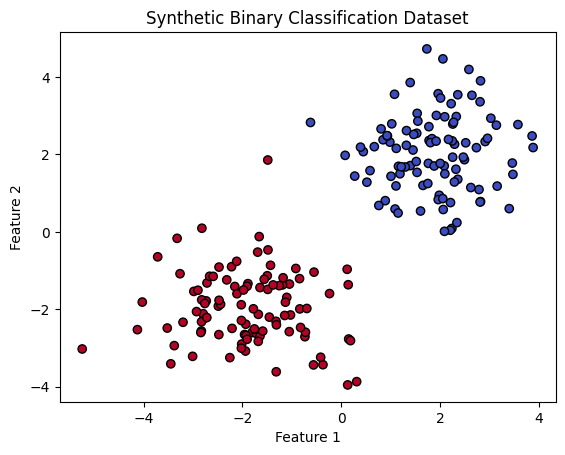

In [6]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We’ll use TensorFlow’s Sequential API to define a single-layer perceptron

In [7]:
# Build a single-layer perceptron model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),  # SGD optimizer with a learning rate of 0.1
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']  # To monitor accuracy during training
)


## Training The Model

In [10]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    epochs=50,         # Number of training epochs
    batch_size=8,      # Number of samples per gradient update
    validation_data=(X_test, y_test)  # Validation data for monitoring
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7614 - loss: 0.4534 - val_accuracy: 0.9750 - val_loss: 0.1241
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0832 - val_accuracy: 0.9750 - val_loss: 0.0860
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0522 - val_accuracy: 0.9750 - val_loss: 0.0720
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0372 - val_accuracy: 0.9750 - val_loss: 0.0647
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0314 - val_accuracy: 0.9750 - val_loss: 0.0601
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 0.9750 - val_loss: 0.0569
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0197 - val_accuracy: 0.9750 - val_loss: 0.0546
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9750 - val_loss

## Visualizing Training Process


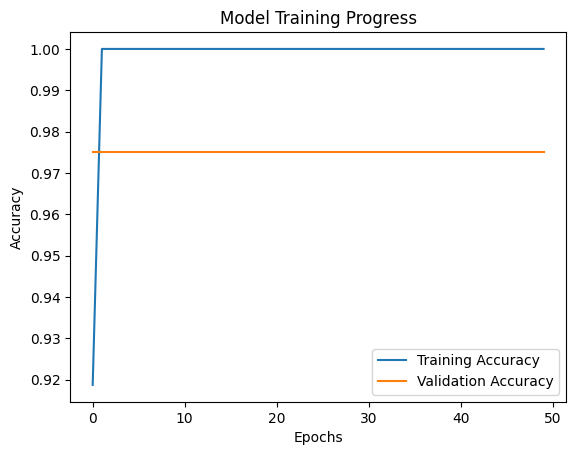

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Progress')
plt.show()


## Model Evaluate

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9833 - loss: 0.0305
Test Loss: 0.0436
Test Accuracy: 0.9750


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


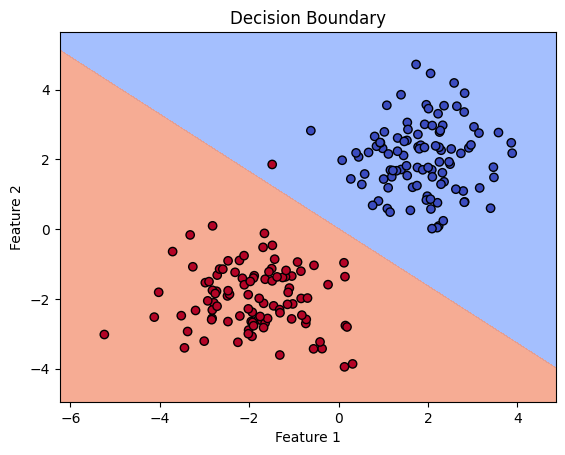

In [12]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, model)
